# Project 4 - Part 1&2 (Core)

# Project 4 - Part 1 (Core)
- Author: Zainab Abu Taha

In [60]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.inspection import permutation_importance

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/05-IntermediateML/Week17/Data/adult.csv')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


1. What is the target?
   - income
2. What does one row represent? (A person? A business? An event? A product?)
   - A person
3. How many features does the data have?
   - 15 feature
4. How many rows are in the dataset?
   - 48842 row
5. What opportunities exist for dimensionality reduction or feature selection with this dataset?
   - Some features are redundant (e.g., education vs educational-num). Others like fnlwgt may be dropped. One-hot encoding creates many columns, so feature selection is useful.
6. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
   - Missing values marked as ?, many categorical variables, and class imbalance (more <=50K than >50K) may affect model performance.

---



## Explore/clean the data


In [ ]:
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].str.strip()

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [ ]:
df['income']=df['income'].apply(lambda x : 0 if x=='<=50K' else 1)

In [ ]:
df.duplicated().sum()

np.int64(52)

In [ ]:
df=df.drop_duplicates()

## Exploratory Visualizations


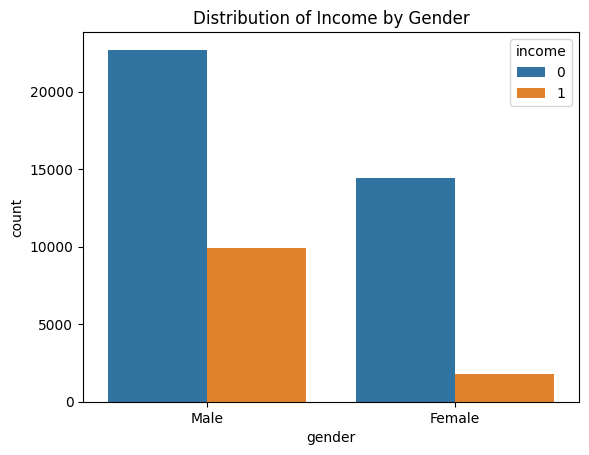

In [ ]:
sns.countplot(data=df, x='gender', hue='income')
plt.title('Distribution of Income by Gender')
plt.show()

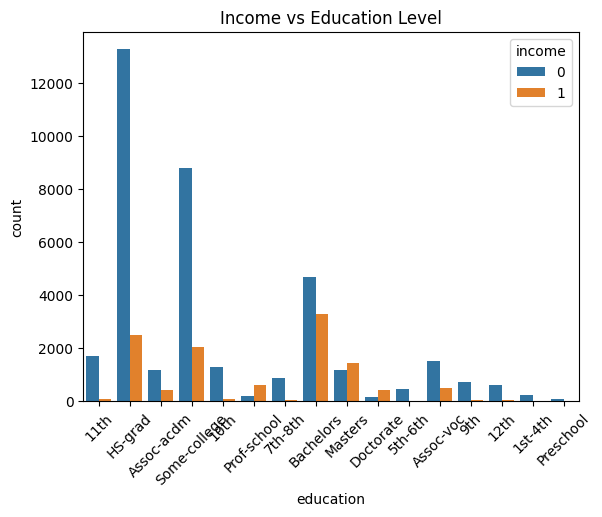

In [ ]:
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title('Income vs Education Level')
plt.show()

## Choose a model


In [ ]:
X = df.drop(columns=['income'])
y = df['income']

In [ ]:
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = [c for c in X.columns if c not in numeric_features]

In [ ]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [ ]:

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='Unknown', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.8534535765525723


ValueError: y should be a 1d array, got an array of shape (9758, 2) instead.

## Create Explanatory Visualizations for the most important features.


In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

In [ ]:
importances = result.importances_mean

importance_series = pd.Series(importances, index=X.columns)
top10 = importance_series.sort_values(ascending=False).head(10)
top10

,0
capital-gain,0.038707
marital-status,0.022084
occupation,0.013377
age,0.013165
relationship,0.008711
capital-loss,0.007973
hours-per-week,0.007317
educational-num,0.006753
workclass,0.002460
fnlwgt,0.002237


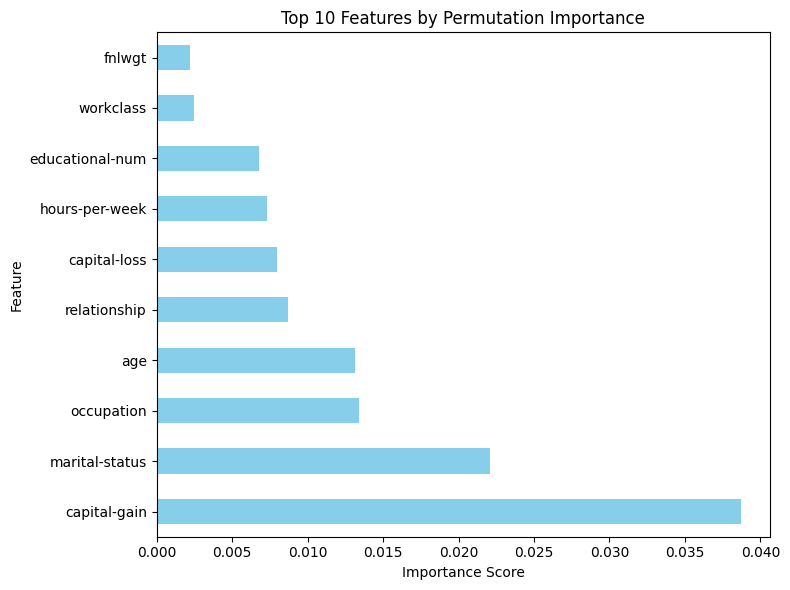

In [ ]:
top10.plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

 Q: Do these features make sense based on the business case?
Yes, the top features identified by permutation importance make sense in the context of predicting income level:
- Age: Older individuals often have more work experience, which can lead to higher income.
- Education Level (education-num): Higher education is typically associated with better-paying jobs.
- Hours-per-week: People who work more hours tend to earn more, especially in salaried or hourly wage roles.
- Occupation: Certain occupations (e.g., executive, tech, medical) are more likely to offer higher salaries.
- Capital-gain: Individuals with capital gains likely have investments or assets, indicating financial stability.
- Marital-status: Married individuals may have more stable household incomes or dual earners.
- Relationship: This feature reflects household roles (e.g., spouse, head of household), which can correlate with income.
- Workclass: The type of employment (e.g., private, government, self-employed) affects income levels.
- Native-country: Economic conditions and job opportunities vary by country, influencing income.
- Sex: Gender disparities in income still exist in many regions and industries.

These features align well with real-world factors that influence a person’s earning potential. They help stakeholders understand which demographic and employment characteristics are most predictive of high income.

# Project 4 - Part 2 (Core)


## Prepar data

In [ ]:
from sklearn.decomposition import PCA
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
X_train_dense = X_train_proc.toarray()
X_test_dense = X_test_proc.toarray()

## PCA

In [ ]:
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)
X_train_with_pca = np.hstack([X_train_dense, X_train_pca])
X_test_with_pca = np.hstack([X_test_dense, X_test_pca])

## Comparing performance expectations


In [ ]:
clf.fit(X_train, y_train)
y_pred_base = clf.predict(X_test)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_with_pca, y_train)
y_pred_pca = model_pca.predict(X_test_with_pca)
print("PCA Accuracy:", accuracy_score(y_test, y_pred_pca))

Baseline Accuracy: 0.8534535765525723
PCA Accuracy: 0.8568354170936667


## Feature Selection (Embedded Method)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(LogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42))
selector.fit(X_train_with_pca, y_train)

X_train_selected = selector.transform(X_train_with_pca)
X_test_selected = selector.transform(X_test_with_pca)

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_selected, y_train)
y_pred_final = final_model.predict(X_test_selected)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))

Final Model Accuracy: 0.857245337159254


## Permutation Importance

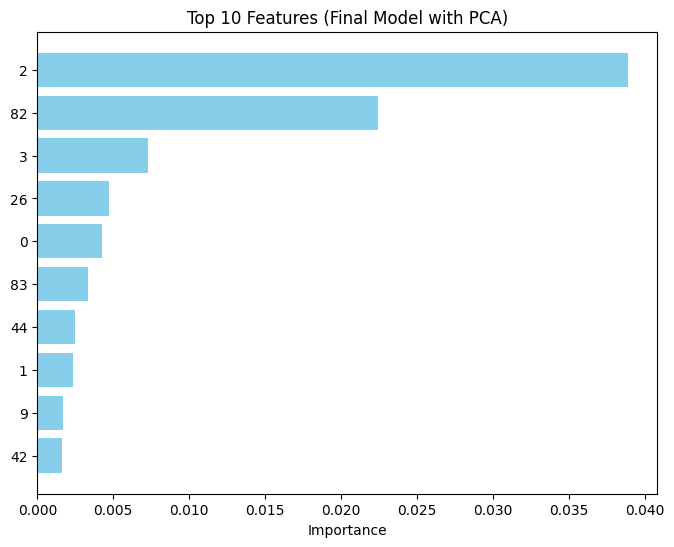

In [59]:
result = permutation_importance(final_model, X_test_selected, y_test, n_repeats=30, random_state=42, n_jobs=-1)
importances = result.importances_mean


indices = np.argsort(importances)[::-1][:10]
top10_importances = importances[indices]

plt.figure(figsize=(8,6))
plt.barh(range(10), top10_importances[::-1], color='skyblue')
plt.yticks(range(10), indices[::-1])
plt.title("Top 10 Features (Final Model with PCA)")
plt.xlabel("Importance")
plt.show()

## Final Observations

- PCA added new explanatory power by summarizing complex categorical interactions.
- Feature selection improved interpretability by focusing on the most relevant predictors.
- Stakeholders can now understand both traditional demographic drivers and latent profiles (via PCA) that influence income classification.